In [14]:
import glob
import datetime as dt
import pandas as pd
import seaborn as sns

# Variables
id_day = '996'      # Endnummer Zaehlpunkt fuer Tagstrom
id_night = '997'    # Endnummer Zaehlpunkt fuer Nachtstrom
day_files = []
night_files = []

path = r'/media/data/coding/strom/stromnetzgraz/raw_import/'
all_files = glob.glob(path + "/*.csv")

# Import energy consumption for day measurements
for filename in all_files:
    if id_day in filename:
        day_files.append(filename)
        df_day = pd.concat((pd.read_csv(r,
                                        decimal=',',
                                        header=0,
                                        parse_dates=['date'],
                                        converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                        names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in day_files))

        df_day['zaehlerstand'] = df_day['zaehlerstand'].astype(float)
        df_day['verbrauch'] = df_day['verbrauch'].astype(float)

In [12]:
print(dayfiles)

['/media/data/coding/strom/stromnetzgraz/raw_import/Ablesungen_Anlage_338901_Zaehlpunkt_AT0081000802000000000000000199996_Tagesübersicht_2022.csv', '/media/data/coding/strom/stromnetzgraz/raw_import/Ablesungen_Anlage_338901_Zaehlpunkt_AT0081000802000000000000000199996_Tagesübersicht_2023.csv']


In [13]:
df_day.sort_values('date')

,date,zaehlerstand,verbrauch
0,2022-01-01,466.455139,4.599803
1,2022-01-02,471.054932,4.599803
2,2022-01-03,475.654724,4.599802
3,2022-01-04,480.254547,4.599803
4,2022-01-05,484.854340,4.599803
...,...,...,...
85,2023-03-27,2580.975000,9.433000
86,2023-03-28,2583.444000,2.469000
87,2023-03-29,2586.428000,2.984000
88,2023-03-30,2591.248000,4.820000


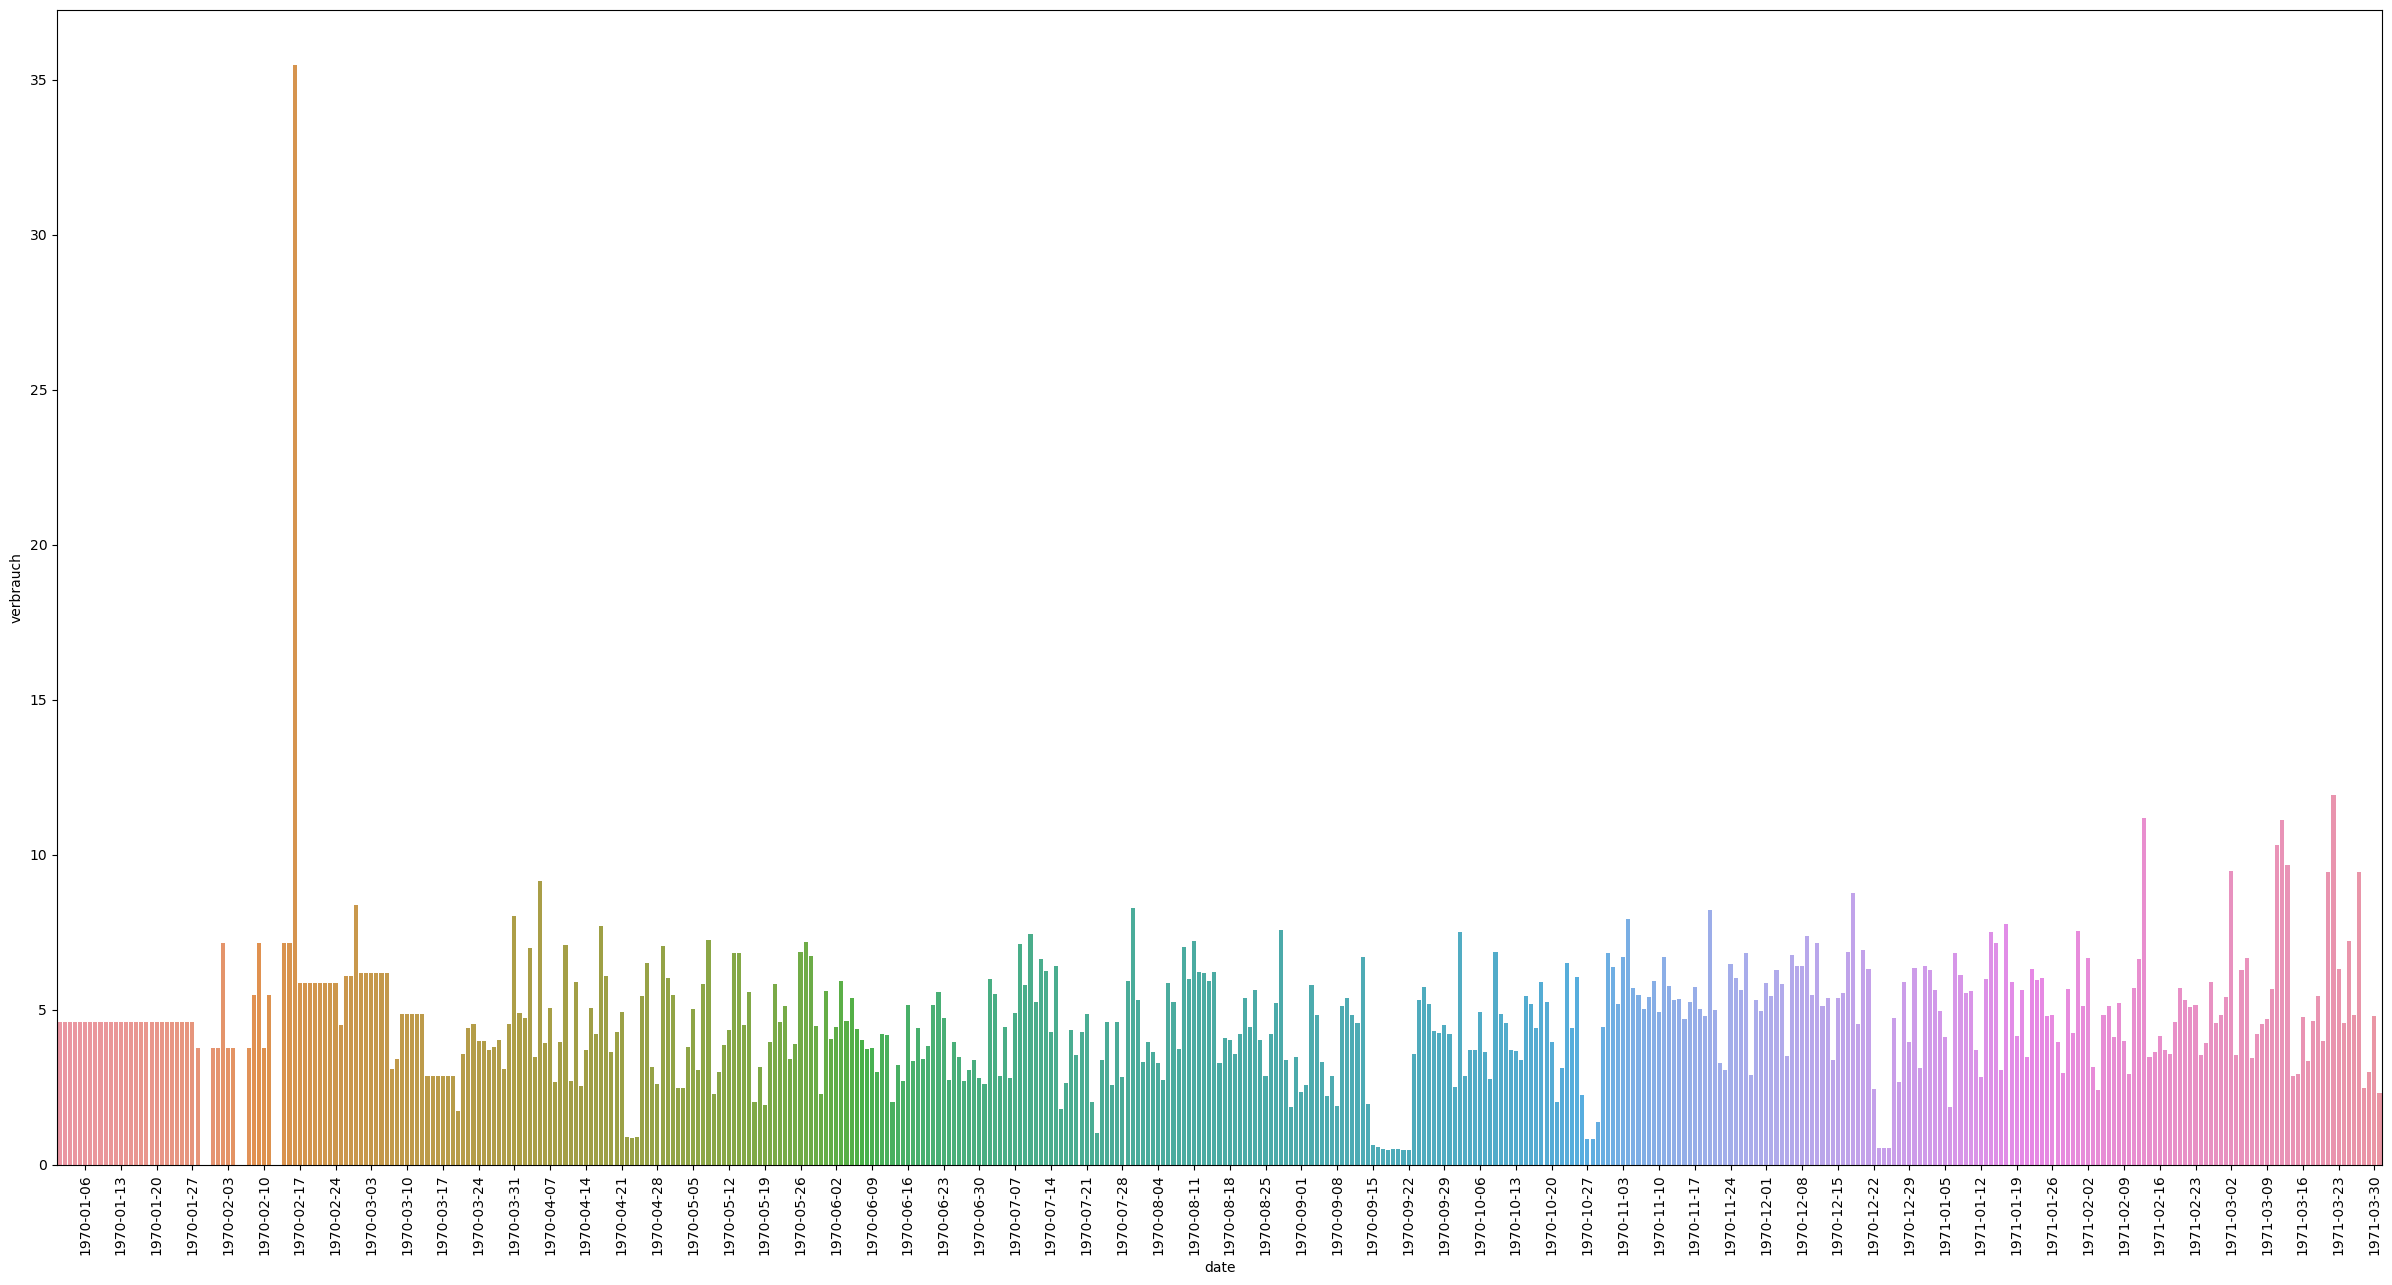

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

fig, ax=plt.subplots(ncols=1, nrows=1, figsize=(30,15))

sns.barplot(data=df_day,
             x='date',
             y='verbrauch')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

plt.show()